In [12]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# !python --version

In [13]:
m = 10**6
n = 2
theta = np.array([[3], [1], [2]])
x1 = np.random.normal(3, 4, m)
x2 = np.random.normal(-1, 4, m)
x = np.stack((np.ones(m), x1, x2), axis=1).reshape((m, n+1, 1))

noise = np.random.normal(0, 2, m).reshape((m, 1))

# s = x1
# mu = 3
# sigma = 4
# count, bins, ignored = plt.hist(s, 30, density=True)
# plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#          linewidth=2, color='r')
# plt.show()

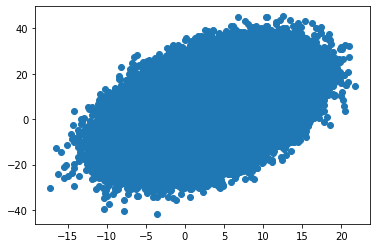

In [14]:
np.random.shuffle(x)
y = np.matmul(theta.T, x)
plt.scatter(x[:,1,:], y)
plt.show()

In [15]:
def hypothesis(theta, x):
    return np.matmul(theta.T, x)

In [16]:
def cost(y, x, theta):
    summation = 0
    for i in range(m):
        summation += (y[i] - hypothesis(theta, x[i]))**2
    return summation / (2 * m)

In [54]:
def stochastic_gradient_descent(learning_rate, r, epsilon):
    t = 0
    theta = np.zeros((n+1, 1))
#     prev_cost = cost(y, x, theta)
    k = 0
#     thetas_and_costs = []
#     thetas_and_costs.append((theta, prev_cost))
    
    while True:
    
        for b in range(int(m/r)):
            theta_t = theta.copy()
            
            for j in range(n+1):
                summation = 0
                for k in range(r):
                    ik = b*r + k
                    summation += (y[ik] - hypothesis(theta_t, x[ik])) * x[ik][j]
                theta[j] = theta[j] + (learning_rate * summation)
                
#             curr_cost = cost(y, x, theta)
#             print(b, t, theta, curr_cost)
            print(b, t, theta, theta_t, abs(theta - theta_t))
            
            if (abs(theta - theta_t) <= epsilon).all():
                k += 1
            else:
                k = 0
            
            if k > 0 or t > 8000:
                return theta
#             prev_cost = curr_cost
            t += 1

In [57]:
theta = stochastic_gradient_descent(0.001, 1, 1e-6)

0 0 [[-0.00096509]
 [-0.00535879]
 [ 0.00459273]] [[0.]
 [0.]
 [0.]] [[0.00096509]
 [0.00535879]
 [0.00459273]]
1 1 [[-0.01051366]
 [-0.02101277]
 [ 0.07253274]] [[-0.00096509]
 [-0.00535879]
 [ 0.00459273]] [[0.00954857]
 [0.01565398]
 [0.06794   ]]
2 2 [[-0.01657686]
 [-0.06772632]
 [ 0.12582075]] [[-0.01051366]
 [-0.02101277]
 [ 0.07253274]] [[0.0060632 ]
 [0.04671354]
 [0.05328801]]
3 3 [[-0.00695465]
 [-0.03919716]
 [ 0.14348154]] [[-0.01657686]
 [-0.06772632]
 [ 0.12582075]] [[0.00962221]
 [0.02852916]
 [0.01766079]]
4 4 [[-0.01829125]
 [ 0.00370257]
 [ 0.20705527]] [[-0.00695465]
 [-0.03919716]
 [ 0.14348154]] [[0.0113366 ]
 [0.04289974]
 [0.06357373]]
5 5 [[-0.01249985]
 [ 0.00873974]
 [ 0.21321368]] [[-0.01829125]
 [ 0.00370257]
 [ 0.20705527]] [[0.0057914 ]
 [0.00503717]
 [0.00615841]]
6 6 [[0.00127702]
 [0.06621101]
 [0.26432789]] [[-0.01249985]
 [ 0.00873974]
 [ 0.21321368]] [[0.01377686]
 [0.05747127]
 [0.05111421]]
7 7 [[0.00433463]
 [0.0552084 ]
 [0.27035102]] [[0.001277

 [1.58432879]] [[0.00113791]
 [0.00552774]
 [0.00249171]]
153 153 [[0.28408888]
 [1.14400188]
 [1.57862408]] [[0.28337248]
 [1.14337826]
 [1.58183708]] [[0.00071641]
 [0.00062361]
 [0.003213  ]]
154 154 [[0.28864281]
 [1.13575065]
 [1.59566816]] [[0.28408888]
 [1.14400188]
 [1.57862408]] [[0.00455392]
 [0.00825123]
 [0.01704408]]
155 155 [[0.29392711]
 [1.13230484]
 [1.62813769]] [[0.28864281]
 [1.13575065]
 [1.59566816]] [[0.0052843 ]
 [0.00344581]
 [0.03246953]]
156 156 [[0.29408983]
 [1.13242056]
 [1.62706593]] [[0.29392711]
 [1.13230484]
 [1.62813769]] [[0.00016272]
 [0.00011572]
 [0.00107176]]
157 157 [[0.29350942]
 [1.12768753]
 [1.63049999]] [[0.29408983]
 [1.13242056]
 [1.62706593]] [[0.00058041]
 [0.00473304]
 [0.00343406]]
158 158 [[0.29760902]
 [1.13239609]
 [1.64758369]] [[0.29350942]
 [1.12768753]
 [1.63049999]] [[0.0040996 ]
 [0.00470856]
 [0.0170837 ]]
159 159 [[0.29695669]
 [1.1293515 ]
 [1.6526496 ]] [[0.29760902]
 [1.13239609]
 [1.64758369]] [[0.00065233]
 [0.00304459

 [1.88239618]] [[0.4757364 ]
 [1.29975925]
 [1.88280139]] [[0.00075676]
 [0.00430374]
 [0.00040521]]
282 282 [[0.47914699]
 [1.29545597]
 [1.86308371]] [[0.47649316]
 [1.30406299]
 [1.88239618]] [[0.00265383]
 [0.00860701]
 [0.01931247]]
283 283 [[0.47954063]
 [1.29706403]
 [1.86043797]] [[0.47914699]
 [1.29545597]
 [1.86308371]] [[0.00039364]
 [0.00160806]
 [0.00264574]]
284 284 [[0.4804113 ]
 [1.30167637]
 [1.85996318]] [[0.47954063]
 [1.29706403]
 [1.86043797]] [[0.00087067]
 [0.00461234]
 [0.00047479]]
285 285 [[0.48378701]
 [1.29952805]
 [1.87597254]] [[0.4804113 ]
 [1.30167637]
 [1.85996318]] [[0.00337571]
 [0.00214833]
 [0.01600936]]
286 286 [[0.4848542 ]
 [1.30305937]
 [1.87203265]] [[0.48378701]
 [1.29952805]
 [1.87597254]] [[0.0010672 ]
 [0.00353132]
 [0.0039399 ]]
287 287 [[0.48666273]
 [1.3077787 ]
 [1.87322275]] [[0.4848542 ]
 [1.30305937]
 [1.87203265]] [[0.00180852]
 [0.00471933]
 [0.0011901 ]]
288 288 [[0.48880804]
 [1.31238368]
 [1.8781746 ]] [[0.48666273]
 [1.3077787 

 [2.16030235e-06]]
420 420 [[0.68958486]
 [1.31891852]
 [1.89932474]] [[0.68887716]
 [1.31452323]
 [1.89692198]] [[0.0007077 ]
 [0.00439528]
 [0.00240276]]
421 421 [[0.68904227]
 [1.31508024]
 [1.90254233]] [[0.68958486]
 [1.31891852]
 [1.89932474]] [[0.0005426 ]
 [0.00383828]
 [0.00321759]]
422 422 [[0.6903299 ]
 [1.31824869]
 [1.89926553]] [[0.68904227]
 [1.31508024]
 [1.90254233]] [[0.00128763]
 [0.00316846]
 [0.0032768 ]]
423 423 [[0.69227075]
 [1.3239954 ]
 [1.91031503]] [[0.6903299 ]
 [1.31824869]
 [1.89926553]] [[0.00194085]
 [0.00574671]
 [0.0110495 ]]
424 424 [[0.69353391]
 [1.32766818]
 [1.90887115]] [[0.69227075]
 [1.3239954 ]
 [1.91031503]] [[0.00126316]
 [0.00367278]
 [0.00144388]]
425 425 [[0.6936681 ]
 [1.32858793]
 [1.90897956]] [[0.69353391]
 [1.32766818]
 [1.90887115]] [[0.00013419]
 [0.00091975]
 [0.00010842]]
426 426 [[0.69463039]
 [1.33165745]
 [1.90585114]] [[0.6936681 ]
 [1.32858793]
 [1.90897956]] [[0.00096229]
 [0.00306952]
 [0.00312842]]
427 427 [[0.69790169]


 [1.89940857]] [[0.86215089]
 [1.25229761]
 [1.90156238]] [[0.00145926]
 [0.00308454]
 [0.00215381]]
560 560 [[0.86522839]
 [1.25801338]
 [1.89775319]] [[0.86361015]
 [1.25538215]
 [1.89940857]] [[0.00161824]
 [0.00263123]
 [0.00165537]]
561 561 [[0.86485556]
 [1.25543577]
 [1.90039246]] [[0.86522839]
 [1.25801338]
 [1.89775319]] [[0.00037283]
 [0.00257761]
 [0.00263927]]
562 562 [[0.86395865]
 [1.24371673]
 [1.8976418 ]] [[0.86485556]
 [1.25543577]
 [1.90039246]] [[0.00089691]
 [0.01171904]
 [0.00275066]]
563 563 [[0.86492572]
 [1.24883195]
 [1.89877691]] [[0.86395865]
 [1.24371673]
 [1.8976418 ]] [[0.00096707]
 [0.00511522]
 [0.00113511]]
564 564 [[0.86660317]
 [1.25131995]
 [1.89730935]] [[0.86492572]
 [1.24883195]
 [1.89877691]] [[0.00167745]
 [0.002488  ]
 [0.00146757]]
565 565 [[0.86782651]
 [1.25455374]
 [1.89438218]] [[0.86660317]
 [1.25131995]
 [1.89730935]] [[0.00122334]
 [0.00323379]
 [0.00292717]]
566 566 [[0.86863769]
 [1.26026772]
 [1.89800799]] [[0.86782651]
 [1.25455374

 [1.97570873]] [[0.00232197]
 [0.00529227]
 [0.00114392]]
714 714 [[1.07825665]
 [1.16344195]
 [1.97988962]] [[1.0763184 ]
 [1.16318419]
 [1.97685264]] [[0.00193825]
 [0.00025776]
 [0.00303698]]
715 715 [[1.08037972]
 [1.16048242]
 [1.97709139]] [[1.07825665]
 [1.16344195]
 [1.97988962]] [[0.00212307]
 [0.00295953]
 [0.00279823]]
716 716 [[1.08146333]
 [1.16630235]
 [1.97831741]] [[1.08037972]
 [1.16048242]
 [1.97709139]] [[0.00108361]
 [0.00581993]
 [0.00122602]]
717 717 [[1.08348285]
 [1.16420348]
 [1.97162535]] [[1.08146333]
 [1.16630235]
 [1.97831741]] [[0.00201952]
 [0.00209887]
 [0.00669206]]
718 718 [[1.0846267 ]
 [1.1686651 ]
 [1.96629663]] [[1.08348285]
 [1.16420348]
 [1.97162535]] [[0.00114385]
 [0.00446162]
 [0.00532873]]
719 719 [[1.0854552 ]
 [1.17398174]
 [1.96618561]] [[1.0846267 ]
 [1.1686651 ]
 [1.96629663]] [[0.0008285 ]
 [0.00531664]
 [0.00011102]]
720 720 [[1.08732706]
 [1.17309787]
 [1.95927491]] [[1.0854552 ]
 [1.17398174]
 [1.96618561]] [[0.00187186]
 [0.00088387

 [0.00050443]]
804 804 [[1.20069303]
 [1.18223173]
 [1.95048082]] [[1.19898781]
 [1.18020401]
 [1.94669046]] [[0.00170522]
 [0.00202772]
 [0.00379036]]
805 805 [[1.20220212]
 [1.1849768 ]
 [1.95173838]] [[1.20069303]
 [1.18223173]
 [1.95048082]] [[0.00150909]
 [0.00274506]
 [0.00125756]]
806 806 [[1.20166859]
 [1.17918456]
 [1.9553106 ]] [[1.20220212]
 [1.1849768 ]
 [1.95173838]] [[0.00053353]
 [0.00579224]
 [0.00357222]]
807 807 [[1.20467385]
 [1.16186295]
 [1.96702194]] [[1.20166859]
 [1.17918456]
 [1.9553106 ]] [[0.00300526]
 [0.01732161]
 [0.01171134]]
808 808 [[1.20587484]
 [1.16632933]
 [1.96729927]] [[1.20467385]
 [1.16186295]
 [1.96702194]] [[0.00120098]
 [0.00446638]
 [0.00027733]]
809 809 [[1.20655646]
 [1.1703461 ]
 [1.96454087]] [[1.20587484]
 [1.16632933]
 [1.96729927]] [[0.00068162]
 [0.00401676]
 [0.0027584 ]]
810 810 [[1.20769044]
 [1.1744027 ]
 [1.96293924]] [[1.20655646]
 [1.1703461 ]
 [1.96454087]] [[0.00113398]
 [0.00405661]
 [0.00160163]]
811 811 [[1.20966313]
 [1.

 [0.00633826]]
931 931 [[1.3342278 ]
 [1.18079488]
 [1.92322314]] [[1.33393758]
 [1.1784094 ]
 [1.9228822 ]] [[0.00029022]
 [0.00238548]
 [0.00034094]]
932 932 [[1.3365798 ]
 [1.17661416]
 [1.93440039]] [[1.3342278 ]
 [1.18079488]
 [1.92322314]] [[0.002352  ]
 [0.00418072]
 [0.01117725]]
933 933 [[1.33732073]
 [1.17963544]
 [1.9321153 ]] [[1.3365798 ]
 [1.17661416]
 [1.93440039]] [[0.00074093]
 [0.00302127]
 [0.00228509]]
934 934 [[1.33958886]
 [1.17092065]
 [1.9292833 ]] [[1.33732073]
 [1.17963544]
 [1.9321153 ]] [[0.00226813]
 [0.00871478]
 [0.002832  ]]
935 935 [[1.34179212]
 [1.17078587]
 [1.94587072]] [[1.33958886]
 [1.17092065]
 [1.9292833 ]] [[0.00220326]
 [0.00013478]
 [0.01658742]]
936 936 [[1.34093636]
 [1.15878248]
 [1.94774299]] [[1.34179212]
 [1.17078587]
 [1.94587072]] [[0.00085576]
 [0.0120034 ]
 [0.00187227]]
937 937 [[1.34223073]
 [1.16525323]
 [1.95837116]] [[1.34093636]
 [1.15878248]
 [1.94774299]] [[0.00129437]
 [0.00647075]
 [0.01062817]]
938 938 [[1.34444234]
 [1.

1062 1062 [[1.47386285]
 [1.16221269]
 [1.95784484]] [[1.4728173 ]
 [1.15972757]
 [1.9605475 ]] [[0.00104555]
 [0.00248513]
 [0.00270266]]
1063 1063 [[1.47620487]
 [1.14883526]
 [1.95169637]] [[1.47386285]
 [1.16221269]
 [1.95784484]] [[0.00234202]
 [0.01337744]
 [0.00614847]]
1064 1064 [[1.47660068]
 [1.15118569]
 [1.94969563]] [[1.47620487]
 [1.14883526]
 [1.95169637]] [[0.00039581]
 [0.00235043]
 [0.00200073]]
1065 1065 [[1.47809021]
 [1.15059258]
 [1.94691022]] [[1.47660068]
 [1.15118569]
 [1.94969563]] [[0.00148953]
 [0.00059311]
 [0.00278541]]
1066 1066 [[1.4796361 ]
 [1.15021127]
 [1.94652685]] [[1.47809021]
 [1.15059258]
 [1.94691022]] [[0.00154589]
 [0.00038131]
 [0.00038337]]
1067 1067 [[1.48203707]
 [1.14579297]
 [1.97365479]] [[1.4796361 ]
 [1.15021127]
 [1.94652685]] [[0.00240097]
 [0.0044183 ]
 [0.02712794]]
1068 1068 [[1.48254848]
 [1.1490919 ]
 [1.97237164]] [[1.48203707]
 [1.14579297]
 [1.97365479]] [[0.00051142]
 [0.00329892]
 [0.00128315]]
1069 1069 [[1.4826874 ]
 [1

 [1.95587151]] [[1.61640689]
 [1.1423038 ]
 [1.95927569]] [[0.00041731]
 [0.00185946]
 [0.00340418]]
1200 1200 [[1.61716548]
 [1.14673127]
 [1.95620303]] [[1.6168242 ]
 [1.14416326]
 [1.95587151]] [[0.00034129]
 [0.002568  ]
 [0.00033152]]
1201 1201 [[1.61808697]
 [1.14907015]
 [1.95433217]] [[1.61716548]
 [1.14673127]
 [1.95620303]] [[0.00092149]
 [0.00233888]
 [0.00187086]]
1202 1202 [[1.61928909]
 [1.1506889 ]
 [1.95488331]] [[1.61808697]
 [1.14907015]
 [1.95433217]] [[0.00120212]
 [0.00161875]
 [0.00055115]]
1203 1203 [[1.61977206]
 [1.15231367]
 [1.95069977]] [[1.61928909]
 [1.1506889 ]
 [1.95488331]] [[0.00048297]
 [0.00162477]
 [0.00418354]]
1204 1204 [[1.61994409]
 [1.15368471]
 [1.95071972]] [[1.61977206]
 [1.15231367]
 [1.95069977]] [[1.72027745e-04]
 [1.37103619e-03]
 [1.99512370e-05]]
1205 1205 [[1.62058647]
 [1.15706197]
 [1.95163623]] [[1.61994409]
 [1.15368471]
 [1.95071972]] [[0.00064238]
 [0.00337726]
 [0.00091651]]
1206 1206 [[1.62180326]
 [1.15874779]
 [1.95301949]] 

 [1.96549548]] [[1.72730548]
 [1.17202231]
 [1.96742772]] [[0.00092672]
 [0.00149797]
 [0.00193224]]
1347 1347 [[1.72808858]
 [1.1724611 ]
 [1.96606038]] [[1.7282322 ]
 [1.17352028]
 [1.96549548]] [[0.00014362]
 [0.00105918]
 [0.0005649 ]]
1348 1348 [[1.72835737]
 [1.1739389 ]
 [1.96562535]] [[1.72808858]
 [1.1724611 ]
 [1.96606038]] [[0.00026879]
 [0.0014778 ]
 [0.00043502]]
1349 1349 [[1.72979229]
 [1.17217451]
 [1.96351298]] [[1.72835737]
 [1.1739389 ]
 [1.96562535]] [[0.00143492]
 [0.00176439]
 [0.00211237]]
1350 1350 [[1.73094203]
 [1.17225773]
 [1.96010972]] [[1.72979229]
 [1.17217451]
 [1.96351298]] [[1.14974398e-03]
 [8.32165312e-05]
 [3.40325612e-03]]
1351 1351 [[1.73096767]
 [1.17246661]
 [1.96021255]] [[1.73094203]
 [1.17225773]
 [1.96010972]] [[2.56380145e-05]
 [2.08877192e-04]
 [1.02829368e-04]]
1352 1352 [[1.73188481]
 [1.17305804]
 [1.95466485]] [[1.73096767]
 [1.17246661]
 [1.96021255]] [[0.00091714]
 [0.00059144]
 [0.0055477 ]]
1353 1353 [[1.73161087]
 [1.17080459]
 [1

 [1.97103515]] [[1.8250546 ]
 [1.14754026]
 [1.96472515]] [[0.00142578]
 [0.00091534]
 [0.00631   ]]
1487 1487 [[1.82667787]
 [1.14792529]
 [1.97096287]] [[1.82648038]
 [1.14662492]
 [1.97103515]] [[1.97494587e-04]
 [1.30036744e-03]
 [7.22734662e-05]]
1488 1488 [[1.82740203]
 [1.15000228]
 [1.97034211]] [[1.82667787]
 [1.14792529]
 [1.97096287]] [[0.00072416]
 [0.002077  ]
 [0.00062076]]
1489 1489 [[1.82863947]
 [1.15011098]
 [1.97359732]] [[1.82740203]
 [1.15000228]
 [1.97034211]] [[0.00123744]
 [0.0001087 ]
 [0.00325521]]
1490 1490 [[1.82975384]
 [1.15096634]
 [1.97605497]] [[1.82863947]
 [1.15011098]
 [1.97359732]] [[0.00111437]
 [0.00085535]
 [0.00245765]]
1491 1491 [[1.83007648]
 [1.15271943]
 [1.97568686]] [[1.82975384]
 [1.15096634]
 [1.97605497]] [[0.00032264]
 [0.00175309]
 [0.00036811]]
1492 1492 [[1.83184635]
 [1.14552151]
 [1.97414651]] [[1.83007648]
 [1.15271943]
 [1.97568686]] [[0.00176986]
 [0.00719792]
 [0.00154035]]
1493 1493 [[1.83188132]
 [1.14578444]
 [1.97409362]] 

1630 1630 [[1.91409786]
 [1.13709659]
 [1.99434118]] [[1.91384105]
 [1.13552023]
 [1.99422965]] [[0.00025681]
 [0.00157636]
 [0.00011154]]
1631 1631 [[1.91498002]
 [1.13829846]
 [1.99169691]] [[1.91409786]
 [1.13709659]
 [1.99434118]] [[0.00088216]
 [0.00120187]
 [0.00264427]]
1632 1632 [[1.91582293]
 [1.13949371]
 [1.98702733]] [[1.91498002]
 [1.13829846]
 [1.99169691]] [[0.00084291]
 [0.00119526]
 [0.00466958]]
1633 1633 [[1.91638923]
 [1.14197801]
 [1.99113369]] [[1.91582293]
 [1.13949371]
 [1.98702733]] [[0.0005663 ]
 [0.0024843 ]
 [0.00410636]]
1634 1634 [[1.91627378]
 [1.14104061]
 [1.99173516]] [[1.91638923]
 [1.14197801]
 [1.99113369]] [[0.00011544]
 [0.0009374 ]
 [0.00060147]]
1635 1635 [[1.91701453]
 [1.14298707]
 [1.99421161]] [[1.91627378]
 [1.14104061]
 [1.99173516]] [[0.00074074]
 [0.00194646]
 [0.00247645]]
1636 1636 [[1.91772554]
 [1.1449994 ]
 [1.99822968]] [[1.91701453]
 [1.14298707]
 [1.99421161]] [[0.00071101]
 [0.00201232]
 [0.00401807]]
1637 1637 [[1.91864024]
 [1

1773 1773 [[1.99322851]
 [1.14938107]
 [1.9867846 ]] [[1.99287689]
 [1.147808  ]
 [1.98663317]] [[0.00035162]
 [0.00157307]
 [0.00015143]]
1774 1774 [[1.99348461]
 [1.15056412]
 [1.98561011]] [[1.99322851]
 [1.14938107]
 [1.9867846 ]] [[0.0002561 ]
 [0.00118305]
 [0.00117448]]
1775 1775 [[1.99427775]
 [1.15175006]
 [1.98625806]] [[1.99348461]
 [1.15056412]
 [1.98561011]] [[0.00079314]
 [0.00118594]
 [0.00064795]]
1776 1776 [[1.99379809]
 [1.14715964]
 [1.98741367]] [[1.99427775]
 [1.15175006]
 [1.98625806]] [[0.00047966]
 [0.00459042]
 [0.00115561]]
1777 1777 [[1.99474216]
 [1.14778981]
 [1.99012115]] [[1.99379809]
 [1.14715964]
 [1.98741367]] [[0.00094407]
 [0.00063017]
 [0.00270748]]
1778 1778 [[1.99552734]
 [1.14893883]
 [1.98981865]] [[1.99474216]
 [1.14778981]
 [1.99012115]] [[0.00078518]
 [0.00114902]
 [0.0003025 ]]
1779 1779 [[1.99463964]
 [1.1383263 ]
 [1.99954778]] [[1.99552734]
 [1.14893883]
 [1.98981865]] [[0.0008877 ]
 [0.01061253]
 [0.00972913]]
1780 1780 [[1.99605045]
 [1

1875 1875 [[2.04792217]
 [1.13308962]
 [2.00328231]] [[2.0481918 ]
 [1.13551233]
 [2.00357053]] [[0.00026963]
 [0.00242271]
 [0.00028821]]
1876 1876 [[2.04815363]
 [1.13437822]
 [2.00184909]] [[2.04792217]
 [1.13308962]
 [2.00328231]] [[0.00023146]
 [0.0012886 ]
 [0.00143323]]
1877 1877 [[2.04738107]
 [1.12445534]
 [2.00250295]] [[2.04815363]
 [1.13437822]
 [2.00184909]] [[0.00077256]
 [0.00992288]
 [0.00065386]]
1878 1878 [[2.04784774]
 [1.12622931]
 [2.00489927]] [[2.04738107]
 [1.12445534]
 [2.00250295]] [[0.00046667]
 [0.00177397]
 [0.00239632]]
1879 1879 [[2.04869007]
 [1.1271482 ]
 [2.00010644]] [[2.04784774]
 [1.12622931]
 [2.00489927]] [[0.00084232]
 [0.0009189 ]
 [0.00479283]]
1880 1880 [[2.05034386]
 [1.11800935]
 [2.0021538 ]] [[2.04869007]
 [1.1271482 ]
 [2.00010644]] [[0.0016538 ]
 [0.00913885]
 [0.00204736]]
1881 1881 [[2.05174632]
 [1.11261015]
 [2.00314506]] [[2.05034386]
 [1.11800935]
 [2.0021538 ]] [[0.00140245]
 [0.0053992 ]
 [0.00099126]]
1882 1882 [[2.05240816]
 [1

 [1.99672468]] [[0.00074953]
 [0.00102085]
 [0.00160499]]
1960 1960 [[2.09176822]
 [1.12486166]
 [1.99821008]] [[2.09104564]
 [1.12377528]
 [1.99832967]] [[0.00072259]
 [0.00108638]
 [0.00011959]]
1961 1961 [[2.09157689]
 [1.12317289]
 [1.99794005]] [[2.09176822]
 [1.12486166]
 [1.99821008]] [[0.00019133]
 [0.00168877]
 [0.00027002]]
1962 1962 [[2.09134088]
 [1.12099356]
 [1.99875014]] [[2.09157689]
 [1.12317289]
 [1.99794005]] [[0.00023601]
 [0.00217933]
 [0.00081009]]
1963 1963 [[2.09142071]
 [1.12154263]
 [1.99896612]] [[2.09134088]
 [1.12099356]
 [1.99875014]] [[7.98272607e-05]
 [5.49064933e-04]
 [2.15979498e-04]]
1964 1964 [[2.09207416]
 [1.12288906]
 [1.99600427]] [[2.09142071]
 [1.12154263]
 [1.99896612]] [[0.00065346]
 [0.00134644]
 [0.00296185]]
1965 1965 [[2.09281473]
 [1.1238512 ]
 [1.99457676]] [[2.09207416]
 [1.12288906]
 [1.99600427]] [[0.00074057]
 [0.00096214]
 [0.00142751]]
1966 1966 [[2.09317616]
 [1.12549537]
 [1.99575294]] [[2.09281473]
 [1.1238512 ]
 [1.99457676]] 

 [1.97164345]] [[0.00056239]
 [0.00147043]
 [0.00115805]]
2037 2037 [[2.12846234]
 [1.09895965]
 [1.96928221]] [[2.12820124]
 [1.09769093]
 [1.9704854 ]] [[0.0002611 ]
 [0.00126872]
 [0.00120319]]
2038 2038 [[2.12965876]
 [1.09316659]
 [1.96327352]] [[2.12846234]
 [1.09895965]
 [1.96928221]] [[0.00119643]
 [0.00579306]
 [0.00600869]]
2039 2039 [[2.1299795 ]
 [1.09450229]
 [1.96186213]] [[2.12965876]
 [1.09316659]
 [1.96327352]] [[0.00032073]
 [0.00133569]
 [0.00141138]]
2040 2040 [[2.12967289]
 [1.09142003]
 [1.96368392]] [[2.1299795 ]
 [1.09450229]
 [1.96186213]] [[0.00030661]
 [0.00308226]
 [0.00182179]]
2041 2041 [[2.13065158]
 [1.09092264]
 [1.96535217]] [[2.12967289]
 [1.09142003]
 [1.96368392]] [[0.00097869]
 [0.00049739]
 [0.00166824]]
2042 2042 [[2.13186003]
 [1.08867777]
 [1.9712883 ]] [[2.13065158]
 [1.09092264]
 [1.96535217]] [[0.00120845]
 [0.00224487]
 [0.00593613]]
2043 2043 [[2.13276438]
 [1.08824526]
 [1.97109291]] [[2.13186003]
 [1.08867777]
 [1.9712883 ]] [[0.00090435

 [0.00013782]]
2135 2135 [[2.17425852]
 [1.10184012]
 [1.96712116]] [[2.17346027]
 [1.10168803]
 [1.96733901]] [[0.00079825]
 [0.00015209]
 [0.00021785]]
2136 2136 [[2.1746678 ]
 [1.10322837]
 [1.96623699]] [[2.17425852]
 [1.10184012]
 [1.96712116]] [[0.00040927]
 [0.00138824]
 [0.00088417]]
2137 2137 [[2.1753064 ]
 [1.10464414]
 [1.96703376]] [[2.1746678 ]
 [1.10322837]
 [1.96623699]] [[0.0006386 ]
 [0.00141577]
 [0.00079677]]
2138 2138 [[2.17611383]
 [1.1038993 ]
 [1.96424655]] [[2.1753064 ]
 [1.10464414]
 [1.96703376]] [[0.00080743]
 [0.00074484]
 [0.00278721]]
2139 2139 [[2.17723427]
 [1.1032829 ]
 [1.97174883]] [[2.17611383]
 [1.1038993 ]
 [1.96424655]] [[0.00112044]
 [0.0006164 ]
 [0.00750228]]
2140 2140 [[2.17740425]
 [1.10408375]
 [1.97074899]] [[2.17723427]
 [1.1032829 ]
 [1.97174883]] [[0.00016998]
 [0.00080085]
 [0.00099984]]
2141 2141 [[2.17770559]
 [1.10504561]
 [1.96880167]] [[2.17740425]
 [1.10408375]
 [1.97074899]] [[0.00030134]
 [0.00096186]
 [0.00194732]]
2142 2142 [[

 [1.95429268]] [[0.00053309]
 [0.00327216]
 [0.00264394]]
2268 2268 [[2.23532575]
 [1.07822349]
 [1.95665207]] [[2.23528768]
 [1.07802597]
 [1.95693661]] [[3.80728165e-05]
 [1.97523952e-04]
 [2.84539037e-04]]
2269 2269 [[2.23591172]
 [1.07807593]
 [1.95397004]] [[2.23532575]
 [1.07822349]
 [1.95665207]] [[0.00058596]
 [0.00014757]
 [0.00268203]]
2270 2270 [[2.23653337]
 [1.08225332]
 [1.95913205]] [[2.23591172]
 [1.07807593]
 [1.95397004]] [[0.00062165]
 [0.00417739]
 [0.00516201]]
2271 2271 [[2.23640965]
 [1.08141379]
 [1.96012812]] [[2.23653337]
 [1.08225332]
 [1.95913205]] [[0.00012372]
 [0.00083953]
 [0.00099607]]
2272 2272 [[2.23684281]
 [1.08271508]
 [1.95919546]] [[2.23640965]
 [1.08141379]
 [1.96012812]] [[0.00043316]
 [0.00130129]
 [0.00093265]]
2273 2273 [[2.23714487]
 [1.08403635]
 [1.95846051]] [[2.23684281]
 [1.08271508]
 [1.95919546]] [[0.00030206]
 [0.00132127]
 [0.00073496]]
2274 2274 [[2.2376571 ]
 [1.08491806]
 [1.95715378]] [[2.23714487]
 [1.08403635]
 [1.95846051]] 

2389 2389 [[2.2877085 ]
 [1.08658299]
 [1.97811773]] [[2.2870733 ]
 [1.08632825]
 [1.97945011]] [[0.0006352 ]
 [0.00025474]
 [0.00133238]]
2390 2390 [[2.28775084]
 [1.08687645]
 [1.97798272]] [[2.2877085 ]
 [1.08658299]
 [1.97811773]] [[4.23362313e-05]
 [2.93463943e-04]
 [1.35013195e-04]]
2391 2391 [[2.28794177]
 [1.08776299]
 [1.97696004]] [[2.28775084]
 [1.08687645]
 [1.97798272]] [[0.00019093]
 [0.00088653]
 [0.00102267]]
2392 2392 [[2.28843048]
 [1.08924657]
 [1.97787368]] [[2.28794177]
 [1.08776299]
 [1.97696004]] [[0.00048871]
 [0.00148359]
 [0.00091364]]
2393 2393 [[2.28839145]
 [1.08892991]
 [1.97792015]] [[2.28843048]
 [1.08924657]
 [1.97787368]] [[3.90212829e-05]
 [3.16658962e-04]
 [4.64735763e-05]]
2394 2394 [[2.28932714]
 [1.08571761]
 [1.97447813]] [[2.28839145]
 [1.08892991]
 [1.97792015]] [[0.00093569]
 [0.0032123 ]
 [0.00344202]]
2395 2395 [[2.28957388]
 [1.08658189]
 [1.97289573]] [[2.28932714]
 [1.08571761]
 [1.97447813]] [[0.00024674]
 [0.00086428]
 [0.0015824 ]]
239

 [0.00014895]]
2545 2545 [[2.35896496]
 [1.06922049]
 [1.97743929]] [[2.3585747 ]
 [1.06780658]
 [1.97753485]] [[3.90261736e-04]
 [1.41391528e-03]
 [9.55602522e-05]]
2546 2546 [[2.3593335 ]
 [1.07034999]
 [1.97645346]] [[2.35896496]
 [1.06922049]
 [1.97743929]] [[0.00036854]
 [0.0011295 ]
 [0.00098583]]
2547 2547 [[2.35993341]
 [1.07101545]
 [1.97740334]] [[2.3593335 ]
 [1.07034999]
 [1.97645346]] [[0.00059991]
 [0.00066546]
 [0.00094988]]
2548 2548 [[2.36071372]
 [1.07017475]
 [1.97960436]] [[2.35993341]
 [1.07101545]
 [1.97740334]] [[0.00078032]
 [0.0008407 ]
 [0.00220102]]
2549 2549 [[2.36097258]
 [1.07084307]
 [1.97707549]] [[2.36071372]
 [1.07017475]
 [1.97960436]] [[0.00025886]
 [0.00066831]
 [0.00252887]]
2550 2550 [[2.36172739]
 [1.06948659]
 [1.97669581]] [[2.36097258]
 [1.07084307]
 [1.97707549]] [[0.00075481]
 [0.00135648]
 [0.00037968]]
2551 2551 [[2.36230267]
 [1.07108058]
 [1.97989366]] [[2.36172739]
 [1.06948659]
 [1.97669581]] [[0.00057528]
 [0.001594  ]
 [0.00319785]]


2660 2660 [[2.40104447]
 [1.07540192]
 [1.97969354]] [[2.40039455]
 [1.07665123]
 [1.98352025]] [[0.00064992]
 [0.0012493 ]
 [0.00382672]]
2661 2661 [[2.40131591]
 [1.07646898]
 [1.97927778]] [[2.40104447]
 [1.07540192]
 [1.97969354]] [[0.00027144]
 [0.00106706]
 [0.00041576]]
2662 2662 [[2.40180639]
 [1.07659265]
 [1.977173  ]] [[2.40131591]
 [1.07646898]
 [1.97927778]] [[0.00049048]
 [0.00012367]
 [0.00210478]]
2663 2663 [[2.40172012]
 [1.07589893]
 [1.97743197]] [[2.40180639]
 [1.07659265]
 [1.977173  ]] [[8.62655848e-05]
 [6.93718408e-04]
 [2.58971313e-04]]
2664 2664 [[2.40263343]
 [1.07289976]
 [1.98009421]] [[2.40172012]
 [1.07589893]
 [1.97743197]] [[0.00091331]
 [0.00299917]
 [0.00266224]]
2665 2665 [[2.40312412]
 [1.0730917 ]
 [1.97816747]] [[2.40263343]
 [1.07289976]
 [1.98009421]] [[0.00049069]
 [0.00019194]
 [0.00192674]]
2666 2666 [[2.40358948]
 [1.07455849]
 [1.98027476]] [[2.40312412]
 [1.0730917 ]
 [1.97816747]] [[0.00046536]
 [0.00146679]
 [0.00210729]]
2667 2667 [[2.4

 [0.00021955]]
2787 2787 [[2.44521828]
 [1.06052957]
 [1.95750162]] [[2.44467488]
 [1.0606908 ]
 [1.95788792]] [[0.00054339]
 [0.00016123]
 [0.0003863 ]]
2788 2788 [[2.44545061]
 [1.06164495]
 [1.95732745]] [[2.44521828]
 [1.06052957]
 [1.95750162]] [[0.00023234]
 [0.00111538]
 [0.00017417]]
2789 2789 [[2.44578284]
 [1.06282555]
 [1.95730204]] [[2.44545061]
 [1.06164495]
 [1.95732745]] [[3.32225212e-04]
 [1.18059310e-03]
 [2.54048549e-05]]
2790 2790 [[2.44591798]
 [1.06279332]
 [1.95592821]] [[2.44578284]
 [1.06282555]
 [1.95730204]] [[1.35143964e-04]
 [3.22218495e-05]
 [1.37382604e-03]]
2791 2791 [[2.44606806]
 [1.06322346]
 [1.9551653 ]] [[2.44591798]
 [1.06279332]
 [1.95592821]] [[0.00015008]
 [0.00043014]
 [0.00076291]]
2792 2792 [[2.44636193]
 [1.06344809]
 [1.95377747]] [[2.44606806]
 [1.06322346]
 [1.9551653 ]] [[0.00029387]
 [0.00022462]
 [0.00138783]]
2793 2793 [[2.44638445]
 [1.06360643]
 [1.95373605]] [[2.44636193]
 [1.06344809]
 [1.95377747]] [[2.25213112e-05]
 [1.58343041e

 [1.9658689 ]] [[2.48992276]
 [1.05160169]
 [1.96713784]] [[0.0002962 ]
 [0.00041956]
 [0.00126894]]
2920 2920 [[2.49022653]
 [1.05207656]
 [1.96584182]] [[2.49021896]
 [1.05202125]
 [1.9658689 ]] [[7.56907491e-06]
 [5.53052326e-05]
 [2.70788998e-05]]
2921 2921 [[2.4907943 ]
 [1.05275214]
 [1.96783579]] [[2.49022653]
 [1.05207656]
 [1.96584182]] [[0.00056777]
 [0.00067558]
 [0.00199397]]
2922 2922 [[2.49095168]
 [1.05367482]
 [1.96762757]] [[2.4907943 ]
 [1.05275214]
 [1.96783579]] [[0.00015738]
 [0.00092268]
 [0.00020822]]
2923 2923 [[2.49095266]
 [1.05368434]
 [1.9676279 ]] [[2.49095168]
 [1.05367482]
 [1.96762757]] [[9.84366805e-07]
 [9.51130863e-06]
 [3.21153763e-07]]
2924 2924 [[2.49156044]
 [1.05052596]
 [1.96424379]] [[2.49095266]
 [1.05368434]
 [1.9676279 ]] [[0.00060778]
 [0.00315837]
 [0.00338411]]
2925 2925 [[2.49185247]
 [1.05185001]
 [1.9643473 ]] [[2.49156044]
 [1.05052596]
 [1.96424379]] [[0.00029204]
 [0.00132405]
 [0.00010351]]
2926 2926 [[2.49224832]
 [1.05240313]
 [1

 [1.98896046]] [[2.52665965]
 [1.06365753]
 [1.98903529]] [[4.49574452e-04]
 [1.54955011e-04]
 [7.48298195e-05]]
3059 3059 [[2.52748679]
 [1.06446688]
 [1.98948294]] [[2.52710923]
 [1.06381248]
 [1.98896046]] [[0.00037757]
 [0.0006544 ]
 [0.00052248]]
3060 3060 [[2.52804296]
 [1.06368834]
 [1.9891345 ]] [[2.52748679]
 [1.06446688]
 [1.98948294]] [[0.00055617]
 [0.00077854]
 [0.00034844]]
3061 3061 [[2.52850042]
 [1.06379047]
 [1.98912282]] [[2.52804296]
 [1.06368834]
 [1.9891345 ]] [[4.57460702e-04]
 [1.02130054e-04]
 [1.16894156e-05]]
3062 3062 [[2.52879554]
 [1.06490139]
 [1.99085244]] [[2.52850042]
 [1.06379047]
 [1.98912282]] [[0.00029512]
 [0.00111092]
 [0.00172962]]
3063 3063 [[2.52897394]
 [1.06559157]
 [1.99003889]] [[2.52879554]
 [1.06490139]
 [1.99085244]] [[0.00017839]
 [0.00069018]
 [0.00081354]]
3064 3064 [[2.52914442]
 [1.06628368]
 [1.98945248]] [[2.52897394]
 [1.06559157]
 [1.99003889]] [[0.00017049]
 [0.00069211]
 [0.00058641]]
3065 3065 [[2.52913071]
 [1.06619302]
 [1

 [1.97683449]] [[2.5731928 ]
 [1.05450499]
 [1.97685214]] [[2.76509910e-05]
 [2.38044926e-04]
 [1.76438381e-05]]
3215 3215 [[2.57330289]
 [1.05455322]
 [1.97578617]] [[2.57316515]
 [1.05426695]
 [1.97683449]] [[0.00013774]
 [0.00028628]
 [0.00104832]]
3216 3216 [[2.57376609]
 [1.05524074]
 [1.97803351]] [[2.57330289]
 [1.05455322]
 [1.97578617]] [[0.0004632 ]
 [0.00068752]
 [0.00224734]]
3217 3217 [[2.57384987]
 [1.05548137]
 [1.97733254]] [[2.57376609]
 [1.05524074]
 [1.97803351]] [[8.37777312e-05]
 [2.40627550e-04]
 [7.00965621e-04]]
3218 3218 [[2.57403786]
 [1.05633142]
 [1.97743799]] [[2.57384987]
 [1.05548137]
 [1.97733254]] [[0.00018799]
 [0.00085005]
 [0.00010545]]
3219 3219 [[2.57394583]
 [1.05543593]
 [1.97731515]] [[2.57403786]
 [1.05633142]
 [1.97743799]] [[9.20333376e-05]
 [8.95492248e-04]
 [1.22839256e-04]]
3220 3220 [[2.57384702]
 [1.05452455]
 [1.97737412]] [[2.57394583]
 [1.05543593]
 [1.97731515]] [[9.88079802e-05]
 [9.11376008e-04]
 [5.89641047e-05]]
3221 3221 [[2.573

 [1.70132315e-04]]
3358 3358 [[2.61325323]
 [1.04705009]
 [1.98965283]] [[2.61309702]
 [1.04645512]
 [1.99054051]] [[0.00015621]
 [0.00059497]
 [0.00088768]]
3359 3359 [[2.61332402]
 [1.0474644 ]
 [1.98937526]] [[2.61325323]
 [1.04705009]
 [1.98965283]] [[7.07835597e-05]
 [4.14302402e-04]
 [2.77566989e-04]]
3360 3360 [[2.61325502]
 [1.04679165]
 [1.98932902]] [[2.61332402]
 [1.0474644 ]
 [1.98937526]] [[6.89973015e-05]
 [6.72745681e-04]
 [4.62354707e-05]]
3361 3361 [[2.61361167]
 [1.0469473 ]
 [1.98900558]] [[2.61325502]
 [1.04679165]
 [1.98932902]] [[0.00035665]
 [0.00015565]
 [0.00032344]]
3362 3362 [[2.61343427]
 [1.04482325]
 [1.98903273]] [[2.61361167]
 [1.0469473 ]
 [1.98900558]] [[1.77401358e-04]
 [2.12405379e-03]
 [2.71466929e-05]]
3363 3363 [[2.61375759]
 [1.04495673]
 [1.98771388]] [[2.61343427]
 [1.04482325]
 [1.98903273]] [[0.00032332]
 [0.00013348]
 [0.00131885]]
3364 3364 [[2.61395037]
 [1.04579452]
 [1.98774388]] [[2.61375759]
 [1.04495673]
 [1.98771388]] [[1.92782607e-0

 [1.98722295]] [[0.00019601]
 [0.00109212]
 [0.0010938 ]]
3491 3491 [[2.64487727]
 [1.04289534]
 [1.98879716]] [[2.64455103]
 [1.0425394 ]
 [1.98831676]] [[0.00032624]
 [0.00035595]
 [0.00048041]]
3492 3492 [[2.64525583]
 [1.04368036]
 [1.99259487]] [[2.64487727]
 [1.04289534]
 [1.98879716]] [[0.00037856]
 [0.00078502]
 [0.00379771]]
3493 3493 [[2.64531592]
 [1.04406019]
 [1.99244435]] [[2.64525583]
 [1.04368036]
 [1.99259487]] [[6.00906538e-05]
 [3.79833212e-04]
 [1.50526951e-04]]
3494 3494 [[2.64550807]
 [1.04478312]
 [1.99252658]] [[2.64531592]
 [1.04406019]
 [1.99244435]] [[1.92146065e-04]
 [7.22927940e-04]
 [8.22304703e-05]]
3495 3495 [[2.64598084]
 [1.04323586]
 [1.99073763]] [[2.64550807]
 [1.04478312]
 [1.99252658]] [[0.00047278]
 [0.00154726]
 [0.00178894]]
3496 3496 [[2.64644502]
 [1.04237562]
 [1.99224268]] [[2.64598084]
 [1.04323586]
 [1.99073763]] [[0.00046418]
 [0.00086024]
 [0.00150505]]
3497 3497 [[2.64687329]
 [1.04174473]
 [1.99292115]] [[2.64644502]
 [1.04237562]
 [1

 [1.99013276]] [[8.41534303e-05]
 [4.79652746e-04]
 [1.64771017e-04]]
3641 3641 [[2.67421928]
 [1.04529936]
 [1.98964137]] [[2.6737935 ]
 [1.04635141]
 [1.99029753]] [[0.00042578]
 [0.00105205]
 [0.00065616]]
3642 3642 [[2.67448841]
 [1.0457972 ]
 [1.99034669]] [[2.67421928]
 [1.04529936]
 [1.98964137]] [[0.00026913]
 [0.00049784]
 [0.00070532]]
3643 3643 [[2.67467289]
 [1.04657877]
 [1.9913594 ]] [[2.67448841]
 [1.0457972 ]
 [1.99034669]] [[0.00018447]
 [0.00078157]
 [0.00101271]]
3644 3644 [[2.67490467]
 [1.04711582]
 [1.99174508]] [[2.67467289]
 [1.04657877]
 [1.9913594 ]] [[0.00023178]
 [0.00053705]
 [0.00038568]]
3645 3645 [[2.67539711]
 [1.04484123]
 [1.9887458 ]] [[2.67490467]
 [1.04711582]
 [1.99174508]] [[0.00049245]
 [0.0022746 ]
 [0.00299928]]
3646 3646 [[2.67558562]
 [1.04542808]
 [1.98880445]] [[2.67539711]
 [1.04484123]
 [1.9887458 ]] [[1.88506333e-04]
 [5.86851428e-04]
 [5.86515015e-05]]
3647 3647 [[2.67580389]
 [1.0459241 ]
 [1.98874776]] [[2.67558562]
 [1.04542808]
 [1

 [1.98914891]] [[2.69971238]
 [1.03001786]
 [1.98593221]] [[0.00035974]
 [0.000795  ]
 [0.00321671]]
3785 3785 [[2.70033204]
 [1.03085328]
 [1.9883053 ]] [[2.70007212]
 [1.03081286]
 [1.98914891]] [[2.59916196e-04]
 [4.04213576e-05]
 [8.43619423e-04]]
3786 3786 [[2.70040573]
 [1.03149443]
 [1.9885728 ]] [[2.70033204]
 [1.03085328]
 [1.9883053 ]] [[7.36957251e-05]
 [6.41149869e-04]
 [2.67504725e-04]]
3787 3787 [[2.70040732]
 [1.03150792]
 [1.98856854]] [[2.70040573]
 [1.03149443]
 [1.9885728 ]] [[1.58867385e-06]
 [1.34875934e-05]
 [4.25735302e-06]]
3788 3788 [[2.70080336]
 [1.03110748]
 [1.99080603]] [[2.70040732]
 [1.03150792]
 [1.98856854]] [[0.00039604]
 [0.00040044]
 [0.00223749]]
3789 3789 [[2.70105644]
 [1.03116957]
 [1.98974662]] [[2.70080336]
 [1.03110748]
 [1.99080603]] [[2.53077106e-04]
 [6.20924346e-05]
 [1.05941869e-03]]
3790 3790 [[2.70137835]
 [1.03006661]
 [1.98711478]] [[2.70105644]
 [1.03116957]
 [1.98974662]] [[0.00032191]
 [0.00110296]
 [0.00263184]]
3791 3791 [[2.701

 [1.99006999]] [[1.53398997e-06]
 [1.13607115e-05]
 [6.59248548e-06]]
3945 3945 [[2.7309947 ]
 [1.03037856]
 [1.98993234]] [[2.730688  ]
 [1.03079738]
 [1.99007659]] [[0.0003067 ]
 [0.00041883]
 [0.00014425]]
3946 3946 [[2.73115554]
 [1.03143998]
 [1.99140709]] [[2.7309947 ]
 [1.03037856]
 [1.98993234]] [[0.00016084]
 [0.00106142]
 [0.00147475]]
3947 3947 [[2.73120442]
 [1.03182266]
 [1.99155599]] [[2.73115554]
 [1.03143998]
 [1.99140709]] [[4.88802175e-05]
 [3.82678829e-04]
 [1.48903425e-04]]
3948 3948 [[2.73130844]
 [1.03227219]
 [1.99122029]] [[2.73120442]
 [1.03182266]
 [1.99155599]] [[0.00010402]
 [0.00044953]
 [0.0003357 ]]
3949 3949 [[2.73133104]
 [1.03240775]
 [1.99108524]] [[2.73130844]
 [1.03227219]
 [1.99122029]] [[2.25950454e-05]
 [1.35560339e-04]
 [1.35053793e-04]]
3950 3950 [[2.73153472]
 [1.03237073]
 [1.98946585]] [[2.73133104]
 [1.03240775]
 [1.99108524]] [[2.03680723e-04]
 [3.70170684e-05]
 [1.61939194e-03]]
3951 3951 [[2.73178329]
 [1.03186263]
 [1.98743505]] [[2.731

 [1.99743716]] [[2.75377756]
 [1.03128219]
 [1.99648686]] [[0.000364  ]
 [0.00126379]
 [0.0009503 ]]
4102 4102 [[2.75426841]
 [1.03054623]
 [1.99772917]] [[2.75414156]
 [1.0300184 ]
 [1.99743716]] [[0.00012685]
 [0.00052783]
 [0.00029201]]
4103 4103 [[2.75438892]
 [1.03107779]
 [1.9982341 ]] [[2.75426841]
 [1.03054623]
 [1.99772917]] [[0.00012051]
 [0.00053156]
 [0.00050493]]
4104 4104 [[2.75456833]
 [1.03143537]
 [1.99780144]] [[2.75438892]
 [1.03107779]
 [1.9982341 ]] [[0.00017941]
 [0.00035758]
 [0.00043266]]
4105 4105 [[2.75461533]
 [1.03171082]
 [1.99749775]] [[2.75456833]
 [1.03143537]
 [1.99780144]] [[4.70018534e-05]
 [2.75450816e-04]
 [3.03685363e-04]]
4106 4106 [[2.75476937]
 [1.03217327]
 [1.99773505]] [[2.75461533]
 [1.03171082]
 [1.99749775]] [[0.00015404]
 [0.00046245]
 [0.0002373 ]]
4107 4107 [[2.75499163]
 [1.03240868]
 [1.99882512]] [[2.75476937]
 [1.03217327]
 [1.99773505]] [[0.00022226]
 [0.00023541]
 [0.00109007]]
4108 4108 [[2.75517516]
 [1.03278462]
 [1.99959133]] 

 [7.14858465e-05]]
4261 4261 [[2.77425666]
 [1.02566768]
 [1.98873385]] [[2.77410864]
 [1.02550016]
 [1.98941955]] [[0.00014802]
 [0.00016751]
 [0.0006857 ]]
4262 4262 [[2.77436821]
 [1.02627282]
 [1.98898188]] [[2.77425666]
 [1.02566768]
 [1.98873385]] [[0.00011155]
 [0.00060514]
 [0.00024803]]
4263 4263 [[2.77443276]
 [1.0266039 ]
 [1.98882761]] [[2.77436821]
 [1.02627282]
 [1.98898188]] [[6.45547722e-05]
 [3.31082329e-04]
 [1.54275370e-04]]
4264 4264 [[2.77452741]
 [1.02682499]
 [1.98824498]] [[2.77443276]
 [1.0266039 ]
 [1.98882761]] [[9.46467054e-05]
 [2.21088549e-04]
 [5.82630683e-04]]
4265 4265 [[2.77472467]
 [1.02679638]
 [1.98770618]] [[2.77452741]
 [1.02682499]
 [1.98824498]] [[1.97255078e-04]
 [2.86102956e-05]
 [5.38792481e-04]]
4266 4266 [[2.77472502]
 [1.02679824]
 [1.98770375]] [[2.77472467]
 [1.02679638]
 [1.98770618]] [[3.55062747e-07]
 [1.86377779e-06]
 [2.43360662e-06]]
4267 4267 [[2.77481799]
 [1.0273455 ]
 [1.98789609]] [[2.77472502]
 [1.02679824]
 [1.98770375]] [[9

 [1.99469481]] [[6.58429966e-05]
 [3.93042312e-04]
 [1.09060963e-05]]
4415 4415 [[2.79150266]
 [1.02431144]
 [1.99465662]] [[2.79148217]
 [1.02415795]
 [1.9946839 ]] [[2.04912265e-05]
 [1.53484889e-04]
 [2.72784905e-05]]
4416 4416 [[2.7918126 ]
 [1.02315268]
 [1.99526884]] [[2.79150266]
 [1.02431144]
 [1.99465662]] [[0.00030994]
 [0.00115876]
 [0.00061221]]
4417 4417 [[2.79185943]
 [1.02352851]
 [1.99551095]] [[2.7918126 ]
 [1.02315268]
 [1.99526884]] [[4.68280223e-05]
 [3.75836561e-04]
 [2.42114133e-04]]
4418 4418 [[2.79200897]
 [1.02388951]
 [1.99545097]] [[2.79185943]
 [1.02352851]
 [1.99551095]] [[1.49541803e-04]
 [3.60997027e-04]
 [5.99774762e-05]]
4419 4419 [[2.79230179]
 [1.02275596]
 [1.99495793]] [[2.79200897]
 [1.02388951]
 [1.99545097]] [[0.00029281]
 [0.00113355]
 [0.00049305]]
4420 4420 [[2.79246047]
 [1.02319941]
 [1.99541684]] [[2.79230179]
 [1.02275596]
 [1.99495793]] [[0.00015869]
 [0.00044345]
 [0.00045892]]
4421 4421 [[2.79266161]
 [1.02316285]
 [1.99495081]] [[2.792

4564 4564 [[2.80935812]
 [1.0186768 ]
 [1.98224616]] [[2.8093629 ]
 [1.01869476]
 [1.98221252]] [[4.78039725e-06]
 [1.79611792e-05]
 [3.36412609e-05]]
4565 4565 [[2.80955279]
 [1.01943062]
 [1.98308333]] [[2.80935812]
 [1.0186768 ]
 [1.98224616]] [[0.00019467]
 [0.00075382]
 [0.00083717]]
4566 4566 [[2.80972898]
 [1.01940437]
 [1.98290468]] [[2.80955279]
 [1.01943062]
 [1.98308333]] [[1.76189063e-04]
 [2.62463935e-05]
 [1.78647057e-04]]
4567 4567 [[2.80992977]
 [1.01998632]
 [1.9836888 ]] [[2.80972898]
 [1.01940437]
 [1.98290468]] [[0.00020079]
 [0.00058196]
 [0.00078412]]
4568 4568 [[2.81008546]
 [1.02039578]
 [1.98386233]] [[2.80992977]
 [1.01998632]
 [1.9836888 ]] [[0.00015569]
 [0.00040945]
 [0.00017353]]
4569 4569 [[2.81024798]
 [1.02058482]
 [1.98382537]] [[2.81008546]
 [1.02039578]
 [1.98386233]] [[1.62519316e-04]
 [1.89047034e-04]
 [3.69627753e-05]]
4570 4570 [[2.81046309]
 [1.02062864]
 [1.98421842]] [[2.81024798]
 [1.02058482]
 [1.98382537]] [[2.15112712e-04]
 [4.38224364e-05

4707 4707 [[2.82406644]
 [1.01717026]
 [1.98740763]] [[2.82405559]
 [1.01708209]
 [1.98743025]] [[1.08445697e-05]
 [8.81725840e-05]
 [2.26150054e-05]]
4708 4708 [[2.8242209 ]
 [1.0173695 ]
 [1.98741592]] [[2.82406644]
 [1.01717026]
 [1.98740763]] [[1.54461503e-04]
 [1.99240385e-04]
 [8.29091746e-06]]
4709 4709 [[2.82440465]
 [1.01695463]
 [1.98695974]] [[2.8242209 ]
 [1.0173695 ]
 [1.98741592]] [[0.00018375]
 [0.00041487]
 [0.00045618]]
4710 4710 [[2.82463176]
 [1.01661151]
 [1.98741079]] [[2.82440465]
 [1.01695463]
 [1.98695974]] [[0.00022711]
 [0.00034312]
 [0.00045105]]
4711 4711 [[2.82482642]
 [1.01700682]
 [1.98823064]] [[2.82463176]
 [1.01661151]
 [1.98741079]] [[0.00019466]
 [0.00039531]
 [0.00081985]]
4712 4712 [[2.82492489]
 [1.01704177]
 [1.9876394 ]] [[2.82482642]
 [1.01700682]
 [1.98823064]] [[9.84712039e-05]
 [3.49516902e-05]
 [5.91243675e-04]]
4713 4713 [[2.82501716]
 [1.01743081]
 [1.98755764]] [[2.82492489]
 [1.01704177]
 [1.9876394 ]] [[9.22670143e-05]
 [3.89033849e-04

 [1.98933562]] [[0.0001314 ]
 [0.00043324]
 [0.00046113]]
4865 4865 [[2.83856528]
 [1.02116943]
 [1.98965718]] [[2.83850778]
 [1.02095201]
 [1.98979675]] [[5.74999913e-05]
 [2.17423816e-04]
 [1.39571847e-04]]
4866 4866 [[2.83869819]
 [1.02178651]
 [1.99055364]] [[2.83856528]
 [1.02116943]
 [1.98965718]] [[0.00013291]
 [0.00061708]
 [0.00089646]]
4867 4867 [[2.83873741]
 [1.02199909]
 [1.99053697]] [[2.83869819]
 [1.02178651]
 [1.99055364]] [[3.92291953e-05]
 [2.12578935e-04]
 [1.66685541e-05]]
4868 4868 [[2.83885623]
 [1.02238689]
 [1.99090552]] [[2.83873741]
 [1.02199909]
 [1.99053697]] [[0.00011881]
 [0.0003878 ]
 [0.00036855]]
4869 4869 [[2.83895864]
 [1.02250924]
 [1.99054531]] [[2.83885623]
 [1.02238689]
 [1.99090552]] [[0.00010241]
 [0.00012235]
 [0.00036021]]
4870 4870 [[2.83907886]
 [1.02273204]
 [1.99055669]] [[2.83895864]
 [1.02250924]
 [1.99054531]] [[1.20219607e-04]
 [2.22803169e-04]
 [1.13756959e-05]]
4871 4871 [[2.83915365]
 [1.02309074]
 [1.990738  ]] [[2.83907886]
 [1.0

 [1.55495658e-05]]
5006 5006 [[2.85119061]
 [1.01685077]
 [1.9919044 ]] [[2.85105575]
 [1.01617479]
 [1.99091045]] [[0.00013486]
 [0.00067597]
 [0.00099395]]
5007 5007 [[2.85127453]
 [1.017076  ]
 [1.99170054]] [[2.85119061]
 [1.01685077]
 [1.9919044 ]] [[8.39147020e-05]
 [2.25228046e-04]
 [2.03858037e-04]]
5008 5008 [[2.85128185]
 [1.01713866]
 [1.99170474]] [[2.85127453]
 [1.017076  ]
 [1.99170054]] [[7.32068340e-06]
 [6.26593604e-05]
 [4.19200080e-06]]
5009 5009 [[2.85135932]
 [1.01730415]
 [1.99138128]] [[2.85128185]
 [1.01713866]
 [1.99170474]] [[7.74723310e-05]
 [1.65497676e-04]
 [3.23458342e-04]]
5010 5010 [[2.8514213 ]
 [1.01759732]
 [1.99134668]] [[2.85135932]
 [1.01730415]
 [1.99138128]] [[6.19820256e-05]
 [2.93169391e-04]
 [3.46026731e-05]]
5011 5011 [[2.85158377]
 [1.01720012]
 [1.99079976]] [[2.8514213 ]
 [1.01759732]
 [1.99134668]] [[0.00016247]
 [0.0003972 ]
 [0.00054692]]
5012 5012 [[2.85172868]
 [1.01702151]
 [1.99041058]] [[2.85158377]
 [1.01720012]
 [1.99079976]] [[0

 [1.99358967]] [[6.68783981e-05]
 [1.89497732e-04]
 [2.33603923e-04]]
5151 5151 [[2.86365087]
 [1.016949  ]
 [1.99335492]] [[2.86363475]
 [1.01683436]
 [1.99335606]] [[1.61119576e-05]
 [1.14641584e-04]
 [1.14369355e-06]]
5152 5152 [[2.86375258]
 [1.01709381]
 [1.99319414]] [[2.86365087]
 [1.016949  ]
 [1.99335492]] [[0.00010171]
 [0.00014481]
 [0.00016078]]
5153 5153 [[2.86396535]
 [1.01614926]
 [1.993214  ]] [[2.86375258]
 [1.01709381]
 [1.99319414]] [[2.12767901e-04]
 [9.44547944e-04]
 [1.98621869e-05]]
5154 5154 [[2.86406106]
 [1.01606711]
 [1.99244975]] [[2.86396535]
 [1.01614926]
 [1.993214  ]] [[9.57083880e-05]
 [8.21479331e-05]
 [7.64248368e-04]]
5155 5155 [[2.86419698]
 [1.01632091]
 [1.99298949]] [[2.86406106]
 [1.01606711]
 [1.99244975]] [[0.00013592]
 [0.0002538 ]
 [0.00053974]]
5156 5156 [[2.864342  ]
 [1.01636269]
 [1.99327747]] [[2.86419698]
 [1.01632091]
 [1.99298949]] [[1.45022552e-04]
 [4.17805896e-05]
 [2.87986971e-04]]
5157 5157 [[2.86453919]
 [1.0156657 ]
 [1.993385

 [1.99647308]] [[2.75739079e-05]
 [1.23089441e-04]
 [1.41399095e-04]]
5300 5300 [[2.87570045]
 [1.01790423]
 [1.99622143]] [[2.87566625]
 [1.01775339]
 [1.99633168]] [[3.41952316e-05]
 [1.50838511e-04]
 [1.10244636e-04]]
5301 5301 [[2.87583973]
 [1.01788416]
 [1.9966784 ]] [[2.87570045]
 [1.01790423]
 [1.99622143]] [[1.39276868e-04]
 [2.00683424e-05]
 [4.56968561e-04]]
5302 5302 [[2.87595101]
 [1.01794453]
 [1.99657203]] [[2.87583973]
 [1.01788416]
 [1.9966784 ]] [[1.11283905e-04]
 [6.03673137e-05]
 [1.06368743e-04]]
5303 5303 [[2.87604938]
 [1.01807782]
 [1.99653304]] [[2.87595101]
 [1.01794453]
 [1.99657203]] [[9.83753051e-05]
 [1.33298325e-04]
 [3.89972903e-05]]
5304 5304 [[2.87624302]
 [1.0176157 ]
 [1.99801535]] [[2.87604938]
 [1.01807782]
 [1.99653304]] [[0.00019363]
 [0.00046212]
 [0.00148231]]
5305 5305 [[2.87638592]
 [1.01725832]
 [1.99622179]] [[2.87624302]
 [1.0176157 ]
 [1.99801535]] [[0.0001429 ]
 [0.00035739]
 [0.00179355]]
5306 5306 [[2.87653215]
 [1.01706691]
 [1.996222

 [1.99206482]] [[0.00013307]
 [0.0002037 ]
 [0.00065963]]
5448 5448 [[2.88579141]
 [1.01398026]
 [1.99286093]] [[2.88575124]
 [1.01369037]
 [1.99272445]] [[4.01692457e-05]
 [2.89890914e-04]
 [1.36483824e-04]]
5449 5449 [[2.88587276]
 [1.01415996]
 [1.99283843]] [[2.88579141]
 [1.01398026]
 [1.99286093]] [[8.13526659e-05]
 [1.79700471e-04]
 [2.25040397e-05]]
5450 5450 [[2.88596776]
 [1.013988  ]
 [1.99224461]] [[2.88587276]
 [1.01415996]
 [1.99283843]] [[9.49907806e-05]
 [1.71954896e-04]
 [5.93816761e-04]]
5451 5451 [[2.8860137 ]
 [1.01421088]
 [1.99224322]] [[2.88596776]
 [1.013988  ]
 [1.99224461]] [[4.59479641e-05]
 [2.22874170e-04]
 [1.38862246e-06]]
5452 5452 [[2.886069  ]
 [1.01427981]
 [1.99195112]] [[2.8860137 ]
 [1.01421088]
 [1.99224322]] [[5.52952999e-05]
 [6.89301027e-05]
 [2.92103161e-04]]
5453 5453 [[2.88606035]
 [1.01421555]
 [1.99196876]] [[2.886069  ]
 [1.01427981]
 [1.99195112]] [[8.64433701e-06]
 [6.42607739e-05]
 [1.76361193e-05]]
5454 5454 [[2.88621927]
 [1.01366474

 [1.99551277]] [[2.89558991]
 [1.01158364]
 [1.99537234]] [[2.21863263e-05]
 [1.86370890e-04]
 [1.40428971e-04]]
5591 5591 [[2.89571971]
 [1.01092465]
 [1.99592312]] [[2.89556772]
 [1.01139726]
 [1.99551277]] [[0.00015199]
 [0.00047262]
 [0.00041035]]
5592 5592 [[2.89572475]
 [1.01095887]
 [1.99589221]] [[2.89571971]
 [1.01092465]
 [1.99592312]] [[5.03663760e-06]
 [3.42187256e-05]
 [3.09125540e-05]]
5593 5593 [[2.89575736]
 [1.01110905]
 [1.99572389]] [[2.89572475]
 [1.01095887]
 [1.99589221]] [[3.26167428e-05]
 [1.50184668e-04]
 [1.68317504e-04]]
5594 5594 [[2.89580646]
 [1.01135127]
 [1.99572   ]] [[2.89575736]
 [1.01110905]
 [1.99572389]] [[4.90927415e-05]
 [2.42219578e-04]
 [3.88905820e-06]]
5595 5595 [[2.89593806]
 [1.01140248]
 [1.99669863]] [[2.89580646]
 [1.01135127]
 [1.99572   ]] [[1.31603012e-04]
 [5.12144925e-05]
 [9.78625624e-04]]
5596 5596 [[2.89597202]
 [1.01157417]
 [1.99657043]] [[2.89593806]
 [1.01140248]
 [1.99669863]] [[3.39666491e-05]
 [1.71689332e-04]
 [1.28194244

In [36]:
a = np.array([2, 0])
b = np.array([1, 4])
abs(a - b) > 3

array([False,  True])